In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## creating the dataset and adding some noise to it.

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
 ## y = mx + b
 ## b = 5

In [7]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data = x_data, columns = ['X DATA'])

In [10]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [11]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [12]:
my_data.head()

,X DATA,Y
0,0.00000,5.248397
1,0.00001,4.704913
2,0.00002,4.849550
3,0.00003,4.297057
4,0.00004,6.232315


In [ ]:
## Creating a small sample from the huge dataset and then plotting it.

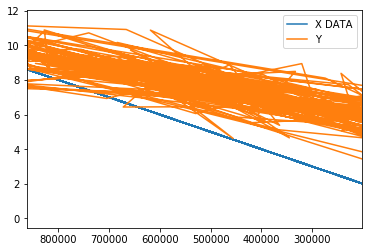

In [16]:
my_data.sample(n = 250).plot()

In [22]:
batch_size = 8

In [19]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [23]:
xPH = tf.placeholder(tf.float32, [batch_size])

In [26]:
yPH = tf.placeholder(tf.float32, [batch_size])

## Defining the graph


In [24]:
y_model = m*xPH + b

In [27]:
error = tf.reduce_sum(tf.square(yPH - y_model))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [29]:
train = optimizer.minimize(error)

In [30]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_index = np.random.randint(len(x_data), size = batch_size)
        
        feed = {xPH : x_data[rand_index], yPH : y_true[rand_index]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [35]:
model_m

0.50986981

In [36]:
model_b

4.8942976

In [41]:
y_hat = x_data*model_m + model_b

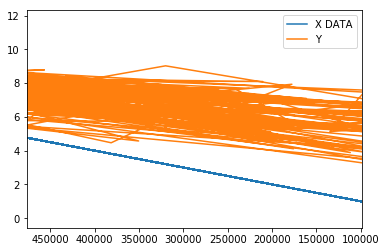

In [44]:
my_data.sample(250).plot()
plt.plot(x_data, y_hat, 'r')